In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(path/'train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.loc[df['Cabin'] == 'B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [7]:
df.loc[[0,33]]#locating with index

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.50,NaN,S


In [8]:
df.loc[0,'Pclass']

3

In [9]:
df.loc[df.Pclass > 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
df.loc[:,'Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [11]:
df.loc[0:4,'Sex']

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
df.loc[df['Age'] > 72,['Pclass','Age'] ]

,Pclass,Age
630,1,80.0
851,3,74.0


In [13]:
df.loc[:,['Pclass','Age']]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


we need to check for missing values in df

***pandas refer missing values as NaN***

In [14]:
df.isna() #return true if null values are present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum() #return column wise sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age and Cabin has null values so we need to replace them


### ***here we replace it with most comman value in that column***
### **to get most commen value in each column *mode* fuction is used***

### incase of tie mode return list of values so we grab the first value

In [16]:
mode = df.mode().iloc[0]

In [17]:
mode

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [18]:
df.loc[:,['Cabin']].isna() # nan in a single column


,Cabin
0,True
1,False
2,True
3,False
4,True
...,...
886,True
887,False
888,True
889,False


## so we replace all the null value in age with 24 and Cabin with B96 B98

In [19]:
#one way to do this
df.loc[df['Age'].isna(),['Age']] = 24.0
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# to fill null values with comman value in all corresponding columns 
df.fillna(mode,inplace=True)

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## all the null values are replaced

In [22]:
#summery of all numeric column
import numpy as np
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

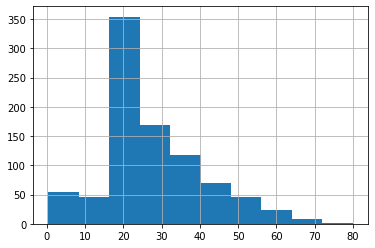

In [23]:
df['Age'].hist()

<AxesSubplot:>

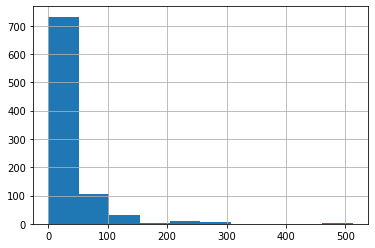

In [24]:
df['Fare'].hist()

## in the neural net work what we do is multiply each column with some coefficient ( 1 row is the data )

###  the Fare is mainly around 0 to 30 but there is some big values this can cause problems 
### when the column is multiplied with coefficients the few rows with really big values will dominate the result

we can find this by plotting with hist

##### to solve this we squish the value by taking the logarithm
there is zero's in Fair column
##### when taking the log of zero it will be infinite to solve this we add 1 before taking log

In [25]:
df['LogFare'] = np.log(df['Fare'] + 1)

<AxesSubplot:>

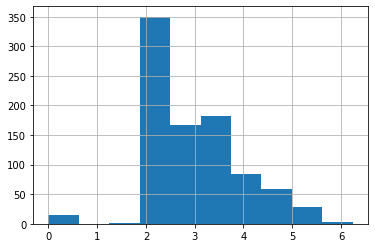

In [26]:
df['LogFare'].hist()

#### Pclass is the data showing socio economic class of passenger 1st class 2nd class 3rd class
#### convert Sex column to number
we replace male with 1 and female with zero 
better than that create 2 column Sex_Female and Sex_Male when female is in row corresponding Sex_female will have value 1 and Sex_male will have 0

pandas has function to do this get_dummies it also removes the original column

in case of Pclass values 1,2,3 it will be converted to Pclass_1,Pclass_2,Pclass_3 and Pclass will be deleted

we will do the same for embarked

Cabin Name and Ticket have too many unique values we cant do this on these columns

In [27]:
df = pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
df.head(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


## create dependent and independent variables
both x and y as tensors

In [29]:
#our target is 'Survived'
t_dep = torch.tensor(df.Survived)

In [30]:
# independent variables are

inde = ['Age', 'SibSp', 'Parch', 'LogFare','Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

t_indep = torch.tensor(df[inde].values,dtype=torch.float)

In [31]:
t_indep.shape

torch.Size([891, 12])

In [32]:
t_dep.shape

torch.Size([891])

### creating a simple model

linear model

we start with random variable for each col in independent variable



In [33]:
torch.manual_seed(442)  # every time we run this cell we get same value for random

#create coeff ranging from -0.5 to 0.5

coeff = torch.rand(t_indep.shape[1])-0.5
coeff

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

### we are not using bias or extra column with all 1 (both have same effect)
**here's a column for "male" and a column for "female", and everyone in the dataset is in exactly one of** 

**these; therefore, we don't need a separate bias term to cover rows that aren't otherwise part of a column**
### we multiply each row in t_indep with coeff and add them up and find the loss and accuracy


In [34]:
t_indep.shape

torch.Size([891, 12])

In [35]:
coeff.shape

torch.Size([12])

In [36]:
mul = t_indep*coeff
mul[100:105]

tensor([[-12.9612,   0.0000,   0.0000,  -0.4943,  -0.0000,  -0.3147,   0.0000,
           0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.4943,  -0.2632,  -0.0000,   0.0000,
           0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [ -9.7209,   0.0000,   0.2409,  -0.9861,  -0.2632,  -0.0000,   0.4876,
           0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-15.2757,   0.0000,   0.0000,  -0.5128,  -0.2632,  -0.0000,   0.0000,
           0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.1273,   0.2772,   0.0000,  -0.4950,  -0.2632,  -0.0000,   0.0000,
           0.0000,   0.2799,  -0.0000,   0.0000,   0.3625]])

here we can see that first column dominates all the columns

this because the age is varying from 0 to 80

we make this problem go away by making it in the range of 0 and 1 by deviding each Age with max 

instead of just doing that for Age we make every col in independent variable to be in a range of 0 and 1

In [37]:
t_indep.max(dim=0) # this will return the value and its index of row

torch.return_types.max(
values=tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000]),
indices=tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0]))

In [38]:
vals,indeces = t_indep.max(dim=0)

t_indep = t_indep / vals

t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])


### t_indep = t_indep / vals

### That is dividing a matrix by a vector 
#### The trick here is that we're taking advantage of a technique in numpy and PyTorch the  broadcasting. 

###  broadcasting. 

this acts as if there's a separate copy of the vector for every row of the matrix, so it divides each row of the matrix by the vector. In practice, it doesn't actually make any copies, and does the whole thing in a highly optimized way, taking full advantage of modern CPUs (or, indeed, GPUs, if we're using them). Broadcasting is one of the most important techniques for making your code concise, maintainable, and fast,

### prediction

In [39]:
pred = (t_indep * coeff).sum(axis=1)
pred[1]

tensor(-0.6239)

In [40]:
pred.min()

tensor(-0.7934)

these predictions are just a starting point for gradient and loss

### loss

In [41]:
#we use mean of error (pred-target) as loss

loss = torch.abs(pred - t_dep).mean()

loss

tensor(0.5382)

In [42]:
#creating function for prediction and loss
def calc_preds(indep,coeff):   return (indep*coeff).sum(axis=1)

def calc_loss(indep,dep,coeff):   return torch.abs(calc_preds(indep,coeff)-dep).mean()

In [43]:
calc_preds(t_indep,coeff)

tensor([ 1.9271e-01, -6.2394e-01,  9.7920e-02,  2.0559e-01,  9.6808e-02,
         6.6329e-03,  1.3064e-01,  3.4756e-01,  1.6131e-01, -6.2851e-01,
         2.5788e-01,  7.9642e-02,  1.8360e-01,  2.4566e-01,  1.6764e-01,
        -5.9545e-02,  2.0139e-01,  1.7833e-01,  5.8931e-02, -6.8922e-01,
         9.0883e-02,  1.2047e-01,  8.9239e-03,  2.9450e-01,  2.6137e-01,
         1.9985e-01, -6.3775e-01,  4.0715e-01, -4.2545e-02,  1.6108e-01,
        -5.6792e-01, -5.6878e-01, -4.2014e-02, -5.7562e-02, -5.1969e-01,
         2.1730e-01, -6.3777e-01,  1.7782e-01,  1.5147e-01, -6.2845e-01,
         2.8432e-02,  1.1045e-01, -6.4059e-01, -4.9598e-01, -1.3614e-02,
         1.6046e-01,  3.7903e-03, -4.2014e-02, -6.3986e-01,  1.3454e-01,
         3.1379e-01,  1.7883e-01, -6.9022e-01,  9.1455e-02, -7.0088e-01,
         3.1765e-01,  1.5135e-01, -6.6381e-01,  3.0835e-01,  3.4221e-01,
        -6.2620e-01,  1.5629e-01,  1.8305e-01,  3.6637e-01, -4.7534e-01,
        -6.0495e-01,  1.0506e-01,  1.8896e-01,  2.9

In [44]:
loss = calc_loss(t_indep,t_dep,coeff)

### Gradient

In [47]:
#invoking gradient in coeff
# coeff.grad.zero_()
coeff.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [51]:
loss = calc_loss(t_indep,t_dep,coeff)
print(loss)
loss.backward() #compute the grad ,each time we do backward new gradient values will be added with existing one
with torch.no_grad():
    coeff.sub_(coeff.grad * 0.1)
    coeff.grad.zero_()
    loss = calc_loss(t_indep,t_dep,coeff)
print (loss)


tensor(0.5043, grad_fn=<MeanBackward0>)
tensor(0.4914)


Note that a.sub_(b) subtracts b from a in-place. In PyTorch, any metho that ends

in _ changes its object in-place. Similarly, a.zero_() sets all elements of a tensor to zero.

### training the model

##### before training splitting data into valid and train set

In [53]:
import sklearn

In [55]:

from sklearn.model_selection import train_test_split

In [190]:
trn_x,val_x,trn_y,val_y = train_test_split(t_indep,t_dep,test_size=0.2,random_state=33)

In [191]:
trn_x.size()

torch.Size([712, 12])

In [192]:
val_x.size()

torch.Size([179, 12])

In [211]:
# function to train

def train_model(trn_x,trn_y,epochs=18,lr = 0.2):
    torch.manual_seed(442)
    coeff = coeff_init(trn_x)           #intialilizing random coefficiets
    coeff.requires_grad_()
    for i in range(epochs):
        loss = calc_loss(trn_x,trn_y,coeff)
        print(loss)
        loss.backward()
        update_coeff(coeff,lr)
    return coeff
    

In [212]:
def coeff_init(trn_x):
    return torch.rand(trn_x.shape[1])-0.5

In [213]:
def update_coeff(coeff,lr):
    with torch.no_grad():
        coeff.sub_(coeff.grad * lr)
        coeff.grad.zero_()

In [214]:
coeff = train_model(trn_x,trn_y)

tensor(0.5327, grad_fn=<MeanBackward0>)
tensor(0.5010, grad_fn=<MeanBackward0>)
tensor(0.4770, grad_fn=<MeanBackward0>)
tensor(0.4547, grad_fn=<MeanBackward0>)
tensor(0.4332, grad_fn=<MeanBackward0>)
tensor(0.4131, grad_fn=<MeanBackward0>)
tensor(0.3954, grad_fn=<MeanBackward0>)
tensor(0.3779, grad_fn=<MeanBackward0>)
tensor(0.3801, grad_fn=<MeanBackward0>)
tensor(0.3415, grad_fn=<MeanBackward0>)
tensor(0.3300, grad_fn=<MeanBackward0>)
tensor(0.3304, grad_fn=<MeanBackward0>)
tensor(0.3162, grad_fn=<MeanBackward0>)
tensor(0.3235, grad_fn=<MeanBackward0>)
tensor(0.2965, grad_fn=<MeanBackward0>)
tensor(0.3070, grad_fn=<MeanBackward0>)
tensor(0.2876, grad_fn=<MeanBackward0>)
tensor(0.2924, grad_fn=<MeanBackward0>)


In [215]:
accuracy(val_x,coeff)

tensor(0.7933)

In [197]:
jermy = torch.tensor([-0.2694,0.0901,0.2359,0.0280,-0.3990,0.2345,0.7232,0.4112,0.3601,0.0955,0.2395,0.2122])

In [181]:
def accuracy(val_x,coeff):
    preds = calc_preds(val_x,coeff)
    pred = torch.tensor([1 if i >= 0.5 else 0 for i in preds])
    return  1-abs(pred-val_y).float().mean()

In [182]:
accuracy(val_x,jermy)

tensor(0.7761)

In [185]:
def show_coeff():    return dict(zip(inde,coeff.requires_grad_(False)))

In [216]:
show_coeff()

{'Age': tensor(-0.3112),
 'SibSp': tensor(0.1040),
 'Parch': tensor(0.2384),
 'LogFare': tensor(0.0088),
 'Sex_male': tensor(-0.4644),
 'Sex_female': tensor(0.2460),
 'Pclass_1': tensor(0.7017),
 'Pclass_2': tensor(0.4169),
 'Pclass_3': tensor(0.3220),
 'Embarked_C': tensor(0.0996),
 'Embarked_Q': tensor(0.2344),
 'Embarked_S': tensor(0.1591)}

In [210]:
abs(pred-val_y).float().sum()

RuntimeError: The size of tensor a (268) must match the size of tensor b (179) at non-singleton dimension 0

In [222]:
pred = calc_preds(val_x,coeff)
pred.max()
pred.min()

tensor(-0.1787)

### some of our predictions are > 1 some are < 0 so we wee need to get that into a range 

In [247]:
import matplotlib.pyplot as plt 
def plot_func(f,min=-10,max=10,color = 'r'):
    r = torch.linspace(min,max,100)
    plt.plot(r,f(r),color)
#

In [248]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

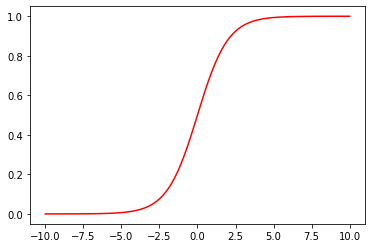

In [249]:

plot_func(sigmoid)

In [242]:
pred = sigmoid(calc_preds(val_x,coeff))
pred.max()
pred.min()
# now the range is within 0 and 1

tensor(0.4555)

In [256]:
def accuracy(val_x,coeff):
    preds = calc_preds(val_x,coeff)
    preds = sigmoid(preds)
    pred = torch.tensor([1 if i > 0.5 else 0 for i in preds])
    return  1-abs(pred-val_y).float().mean()

In [257]:
accuracy(val_x,coeff)

tensor(0.6648)

## SUBMITTING TO KAGGLE

In [259]:
#PREDICT ON TEST SET
test_df = pd.read_csv(path/'test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## do all the preprocessing done to train data

In [263]:
# looking for missing values

test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [268]:
test_df.mode() #order by most comman to least comman in each column

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3.0,"Abbott, Master. Eugene Joseph",male,21.0,0.0,0.0,PC 17608,7.75,B57 B59 B63 B66,S
1,893,NaN,"Abelseth, Miss. Karen Marie",NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2,894,NaN,"Abelseth, Mr. Olaus Jorgensen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,895,NaN,"Abrahamsson, Mr. Abraham August Johannes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,896,NaN,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"de Brito, Mr. Jose Joaquim",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1306,NaN,"de Messemaeker, Mr. Guillaume Joseph",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,1307,NaN,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1308,NaN,"van Billiard, Master. James William",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
#find the most comman values in each column
modes = test_df.mode().iloc[0]
modes

PassengerId                              892
Pclass                                   3.0
Name           Abbott, Master. Eugene Joseph
Sex                                     male
Age                                     21.0
SibSp                                    0.0
Parch                                    0.0
Ticket                              PC 17608
Fare                                    7.75
Cabin                        B57 B59 B63 B66
Embarked                                   S
Name: 0, dtype: object

In [272]:
#replace columns having NaN with corresponding most comman value in that column

test_df.fillna(modes,inplace=True)

In [273]:
#check

test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [278]:
#taking log of Fare You know why!

test_df['LogFare'] = np.log(df['Fare'] + 1)


# making dummies for categorical values of ie most repeating
j = ['Sex','Pclass','Embarked']

test_df = pd.get_dummies(test_df,columns=j)
test_df.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [279]:
test_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,B57 B59 B63 B66,2.110213,0,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B57 B59 B63 B66,4.280593,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,B57 B59 B63 B66,2.188856,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,B57 B59 B63 B66,3.990834,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2.202765,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",21.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,0.000000,0,1,0,0,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,2.188856,1,0,1,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2.202765,0,1,0,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",21.0,0,0,359309,8.0500,B57 B59 B63 B66,3.511545,0,1,0,0,1,0,0,1


In [281]:
test_x = test_df[['Age', 'SibSp', 'Parch', 'LogFare','Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [283]:
test_x

,Age,SibSp,Parch,LogFare,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,2.110213,1,0,0,0,1,0,1,0
1,47.0,1,0,4.280593,0,1,0,0,1,0,0,1
2,62.0,0,0,2.188856,1,0,0,1,0,0,1,0
3,27.0,0,0,3.990834,1,0,0,0,1,0,0,1
4,22.0,1,1,2.202765,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,21.0,0,0,0.000000,1,0,0,0,1,0,0,1
414,39.0,0,0,2.188856,0,1,1,0,0,1,0,0
415,38.5,0,0,2.202765,1,0,0,0,1,0,0,1
416,21.0,0,0,3.511545,1,0,0,0,1,0,0,1


In [285]:
# creating tensor from test_df
k = ['Age', 'SibSp', 'Parch', 'LogFare','Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
test = torch.tensor(test_df[k].values,dtype=torch.float)

# making within a range (dividing with values we previously devided)

test = test/vals

In [284]:
vals

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000])

# predict

In [296]:
pred = sigmoid(calc_preds(test,coeff))
pred = torch.tensor([1 if i > 0.5 else 0 for i in pred])
test_df['Survived'] = pred

In [297]:
test_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,B57 B59 B63 B66,2.110213,0,1,0,0,1,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B57 B59 B63 B66,4.280593,1,0,0,0,1,0,0,1,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,B57 B59 B63 B66,2.188856,0,1,0,1,0,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,B57 B59 B63 B66,3.990834,0,1,0,0,1,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2.202765,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",21.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,0.000000,0,1,0,0,1,0,0,1,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,2.188856,1,0,1,0,0,1,0,0,1
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2.202765,0,1,0,0,1,0,0,1,0
416,1308,"Ware, Mr. Frederick",21.0,0,0,359309,8.0500,B57 B59 B63 B66,3.511545,0,1,0,0,1,0,0,1,0


## submitting to kaggle

In [298]:
sub_df = test_df[["PassengerId","Survived"]]
sub_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [299]:
sub_df.to_csv('submission.csv',index=False)

In [300]:
!kaggle competitions submit -c titanic -f submission.csv -m "nn from scratch"

100%|████████████████████████████████████████| 2.77k/2.77k [00:06<00:00, 450B/s]
Successfully submitted to Titanic - Machine Learning from Disaster